# Deploy Model

In the previous notebook, we trained the model. Now we are going to load the model and exercise it against unseen images.

## Load the Model & Libraries

In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys

model = keras.models.load_model('./models/ships_model')

# Sanity check that it's the same model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)       

## Prepare an Image

It's likely the images that we trained the model on are higher resolution and different than the 80 x 80 pixels. An important note is that the input must match the shape of the data that the model was trained on.

Here is the link to the exact Google Earh Image imported for this notebook: https://earth.google.com/web/search/panama+canal/@8.84828179,-79.51707735,-0.75627665a,5515.17281073d,35y,-0h,0t,0r/data=CigiJgokCepuc-6U8vQ_EXify2JrxvQ_GVAo_Y707FlAIbWTzJ3F61lA

## Display the Images

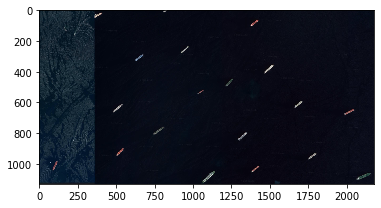

In [6]:
image = Image.open('./images/ships.png') # << CHANGE THIS SAT-IMAGE TO ANOTHER
pix = image.load()

# Display image, but for use we need to make a vector
plt.imshow(image)

## Normalize the image

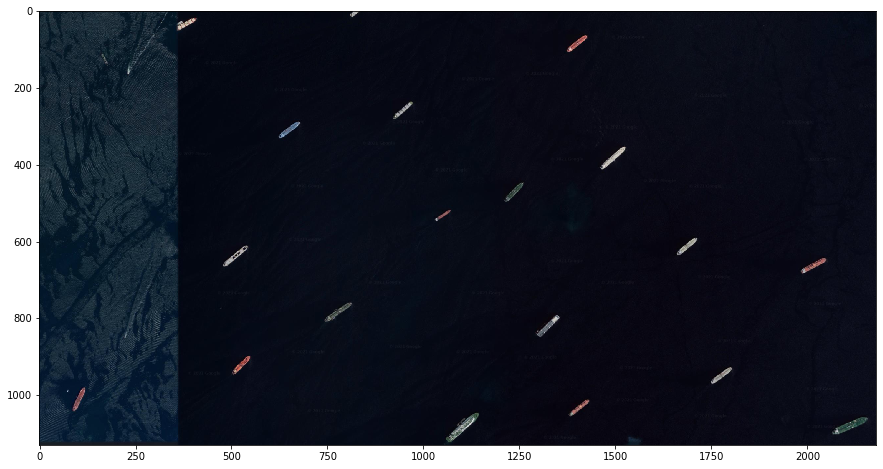

In [7]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
plt.figure(1, figsize = (15, 30))
plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)
plt.show()

# Infer

Detect the ships on the image.

In [8]:
picture_tensor = picture_tensor.transpose(2,0,1)

# Search on the image
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result
    
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:1360 Y:40  [[2.470513e-06 9.999975e-01]]


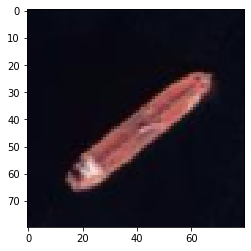

X:900 Y:220  [[0.06636928 0.93363076]]


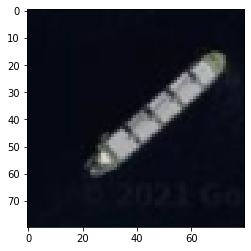

X:1450 Y:340  [[0.01209516 0.9879048 ]]


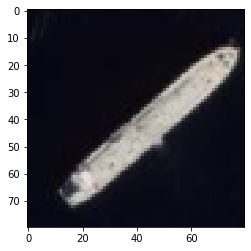

X:1640 Y:570  [[0.01269404 0.987306  ]]


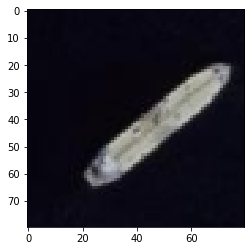

X:470 Y:590  [[0.02931176 0.9706882 ]]


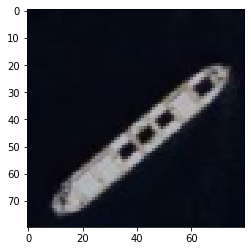

X:1970 Y:620  [[7.142480e-05 9.999286e-01]]


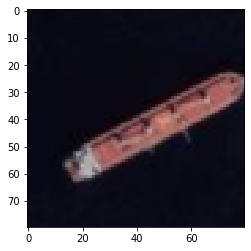

X:1280 Y:780  [[0.00311983 0.9968802 ]]


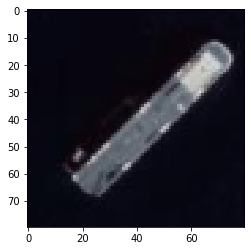

X:490 Y:880  [[0.05455457 0.9454454 ]]


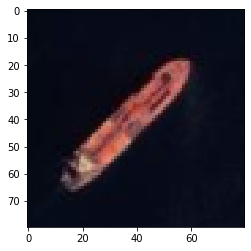

X:1730 Y:910  [[0.00226184 0.9977381 ]]


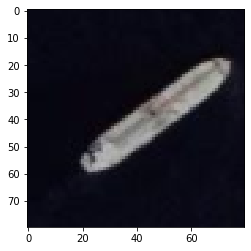

X:60 Y:970  [[0.03578774 0.96421224]]


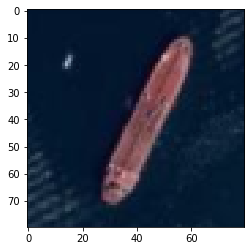

X:1360 Y:990  [[0.02918409 0.97081596]]


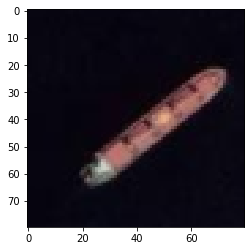

X:1060 Y:1040  [[0.08424117 0.9157588 ]]


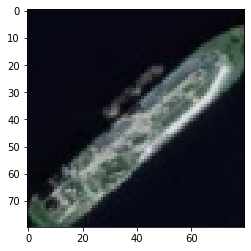

X:2100 Y:1050  

In [9]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [10]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [11]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1130, 2180, 3)

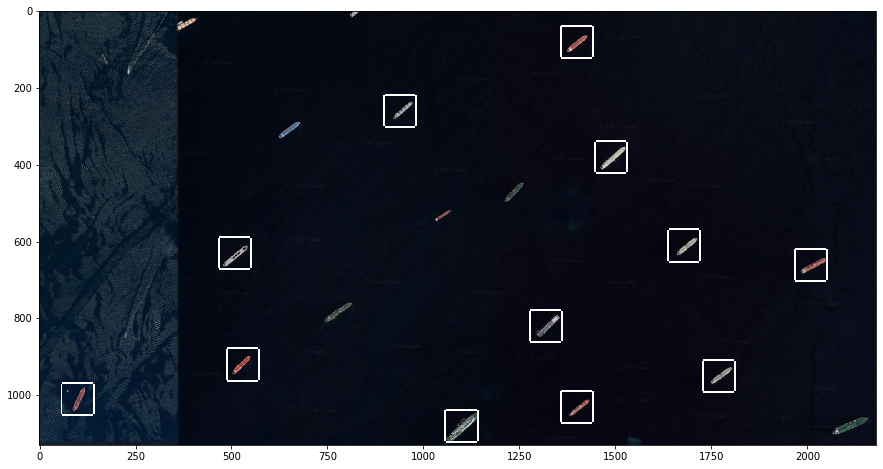

In [12]:
# show the detected ships on the input image
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()

In [13]:
# Clear the Memory

import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

E0414 20:19:39.135796 140476643563328 alias.py:221] Invalid alias: The name clear can't be aliased because it is another magic command.
E0414 20:19:39.136632 140476643563328 alias.py:221] Invalid alias: The name more can't be aliased because it is another magic command.
E0414 20:19:39.137155 140476643563328 alias.py:221] Invalid alias: The name less can't be aliased because it is another magic command.
E0414 20:19:39.137610 140476643563328 alias.py:221] Invalid alias: The name man can't be aliased because it is another magic command.
